# Experiment

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import random
from gfn_environments.single_color_ramp import *

import pandas as pd
import torch
import random


# ============================================================================
# STATE FORMAT DOCUMENTATION
# ============================================================================
# State tensor structure (36 dimensions):
# [0]      : W (noise parameter, normalized 0-1)
# [1]      : Scale (noise parameter, normalized 0-1)
# [2]      : Done flag (0 or 1)
# [3:35]   : Color sequence (32 colors, normalized hex values 0-1)
# [35]     : Metadata (num_colors / max_colors)
#
# Action space (35 actions):
# [0:33]   : Add color actions (34 possible colors)
# [34]     : Done action
# ============================================================================


# ============================================================================
# Initialize Environment and Print Sample States/Actions
# ============================================================================

blender_api = BlenderTerrainAPI()
s_wstep = v2StepWEnv()

# Get dimensions
blender_api.reset_env()
sample_state = blender_api.blender_env_to_tensor()
state_dim = sample_state.shape[0]
action_dim = s_wstep.n_actions



Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"


In [2]:
import pandas as pd
import torch
import random
import torch
import torch.nn as nn
import torch.optim as optim
import random
from gfn_environments.single_color_ramp import *

import pandas as pd
import torch
import random



# ============================================================================
# STATE FORMAT DOCUMENTATION
# ============================================================================
# State tensor structure (36 dimensions):
# [0]      : W (noise parameter, normalized 0-1)
# [1]      : Scale (noise parameter, normalized 0-1)
# [2]      : Done flag (0 or 1)
# [3:35]   : Color sequence (32 colors, normalized hex values 0-1)
# [35]     : Metadata (num_colors / max_colors)
#
# Action space (35 actions):
# [0:33]   : Add color actions (34 possible colors)
# [34]     : Done action
# ============================================================================

# ============================================================================
# Generate Random Trajectories
# ============================================================================

trajectory_records = []

for traj_idx in range(1000):
    # Reset environment
    blender_api.reset_env()
    state = blender_api.blender_env_to_tensor()

    # Track which actions have been used
    used_actions = set()

    # EXACTLY 10 color actions, then 1 done action
    for step_num in range(11):  # 10 colors + 1 done = 11 steps total

        # Extract state components
        done_flag = state[2]
        color_sequence = state[3:35]
        metadata = state[34]

        # Valid actions are any color action (0 to action_dim-2) not yet used
        valid_color_actions = [a for a in range(action_dim - 1) if a not in used_actions]

        # Pick random valid color action
        action = random.choice(valid_color_actions)
        used_actions.add(action)

        # Execute action
        s_wstep.execute_idx(blender_api, action)
        next_state = blender_api.blender_env_to_tensor()

        # Extract next state components
        next_done_flag = next_state[2]
        next_color_sequence = next_state[3:35]
        next_metadata = next_state[34]

        # Count non-zero colors
        num_colors_before = (color_sequence != 0).sum().item()
        num_colors_after = (next_color_sequence != 0).sum().item()
        heightmap=blender_api.get_heightmap()
        # Record this step
        trajectory_records.append({
            'trajectory_id': traj_idx,
            'state': state,
            'step': step_num,
            'action': action,
            'heightmap':heightmap,
            'w_before': state[0].item(),
            'scale_before': state[1].item(),
            'done_flag_before': int(done_flag.item()),
            'done_flag_after': int(next_done_flag.item()),
            'num_colors_before': num_colors_before,
            'num_colors_after': num_colors_after,
            'metadata_before': metadata.item(),
            'metadata_after': next_metadata.item(),
            'heightmap_min': float(heightmap.min().item()),
            'heightmap_max': float(heightmap.max().item()),
            'heightmap_mean': float(heightmap.mean().item()),
        })

        state = next_state

    print(f"Trajectory {traj_idx}: 11 steps (10 colors + done), final colors={num_colors_after}")

# Create DataFrame
df = pd.DataFrame(trajectory_records)

print(f"\n{'='*80}")
print(f"Generated {df['trajectory_id'].nunique()} trajectories")
print(f"Total rows: {len(df)}")

print(f"\n{'='*80}")
print("Trajectory length summary:")
traj_lengths = df[df['step'] != 'FINAL'].groupby('trajectory_id').size()
print(traj_lengths.describe())

print(f"\n{'='*80}")
print("First trajectory:")
print(df[df['trajectory_id'] == 0])

print(f"\n{'='*80}")
print("Sample of FINAL rows (with heightmap data):")
print(df[df['step'] == 'FINAL'].head(10))

# Display the dataframe
df

Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Trajectory 0: 11 steps (10 colors + done), final colors=32
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Trajectory 1: 11 steps (10 colors + done), final colors=32
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Trajectory 2: 11 steps (10 colors + done), final colors=32
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Trajectory 3: 11 steps (10 colors + done), final colors=32
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Trajectory 4: 11 steps (10 colors + done), final colors=32
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Trajectory 5: 11 steps (10 colors + done), final colors=32
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"
Tr

,trajectory_id,state,step,action,heightmap,w_before,scale_before,done_flag_before,done_flag_after,num_colors_before,num_colors_after,metadata_before,metadata_after,heightmap_min,heightmap_max,heightmap_mean
0,0,"[tensor(0.5000), tensor(0.0200), tensor(-1.), ...",0,8,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.5,0.02,-1,0,31,32,0.00000,0.03125,0.566667,0.566667,0.566667
1,0,"[tensor(0.5000), tensor(0.0200), tensor(0.4008...",1,28,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.5,0.02,0,0,32,32,0.03125,0.06250,0.385008,0.566667,0.532457
2,0,"[tensor(0.5000), tensor(0.0200), tensor(0.4008...",2,5,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.5,0.02,0,0,32,32,0.06250,0.09375,0.300000,0.566667,0.500613
3,0,"[tensor(0.5000), tensor(0.0200), tensor(0.4008...",3,33,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.5,0.02,0,0,32,32,0.09375,0.12500,0.300000,0.566667,0.479429
4,0,"[tensor(0.5000), tensor(0.0200), tensor(0.4008...",4,22,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.5,0.02,0,0,32,32,0.12500,0.15625,0.300000,0.807417,0.478267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,999,"[tensor(0.5000), tensor(0.0200), tensor(0.4000...",6,2,"[[tensor(0.4000), tensor(0.4000), tensor(0.400...",0.5,0.02,0,0,32,32,0.18750,0.21875,0.197844,0.725575,0.434428
10996,999,"[tensor(0.5000), tensor(0.0200), tensor(0.4000...",7,25,"[[tensor(0.4000), tensor(0.4000), tensor(0.400...",0.5,0.02,0,0,32,32,0.21875,0.25000,0.194166,0.733170,0.433415
10997,999,"[tensor(0.5000), tensor(0.0200), tensor(0.4000...",8,29,"[[tensor(0.4000), tensor(0.4000), tensor(0.400...",0.5,0.02,0,0,32,32,0.25000,0.28125,0.195987,0.729814,0.431738
10998,999,"[tensor(0.5000), tensor(0.0200), tensor(0.4000...",9,32,"[[tensor(0.4000), tensor(0.4000), tensor(0.400...",0.5,0.02,0,0,32,32,0.28125,0.31250,0.094152,0.724256,0.422225


In [3]:
# Filter for step == 10 and display
df[df['step'] == 10]

,trajectory_id,state,step,action,heightmap,w_before,scale_before,done_flag_before,done_flag_after,num_colors_before,num_colors_after,metadata_before,metadata_after,heightmap_min,heightmap_max,heightmap_mean
10,0,"[tensor(0.5000), tensor(0.0200), tensor(0.4008...",10,26,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.50,0.020,0,0,32,32,0.31250,0.34375,0.194418,0.992398,0.539421
21,1,"[tensor(0.5000), tensor(0.0200), tensor(1.), t...",10,6,"[[tensor(1.), tensor(1.), tensor(1.), tensor(1...",0.50,0.020,1,1,32,32,0.31250,0.34375,0.167464,1.000000,0.711406
32,2,"[tensor(0.5000), tensor(0.0200), tensor(0.8471...",10,7,"[[tensor(0.8667), tensor(0.8667), tensor(0.866...",0.50,0.020,0,0,32,32,0.31250,0.34375,0.118665,0.866667,0.579000
43,3,"[tensor(0.5200), tensor(0.0200), tensor(0.0008...",10,32,"[[tensor(0.2000), tensor(0.2000), tensor(0.200...",0.52,0.020,0,0,32,32,0.28125,0.31250,0.200000,0.999988,0.362742
54,4,"[tensor(0.5000), tensor(0.0200), tensor(0.4008...",10,30,"[[tensor(0.5667), tensor(0.5667), tensor(0.566...",0.50,0.020,0,0,32,32,0.31250,0.34375,0.124804,0.768302,0.449946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,995,"[tensor(0.5000), tensor(0.0220), tensor(0.1498...",10,9,"[[tensor(0.1750), tensor(0.1896), tensor(0.143...",0.50,0.022,0,0,32,32,0.28125,0.31250,0.081341,0.729602,0.208571
10966,996,"[tensor(0.5000), tensor(0.0200), tensor(0.0984...",10,1,"[[tensor(0.6332), tensor(0.1280), tensor(0.267...",0.50,0.020,0,0,32,32,0.31250,0.31250,0.116667,0.996760,0.277242
10977,997,"[tensor(0.5000), tensor(0.0200), tensor(0.2008...",10,10,"[[tensor(0.2333), tensor(0.2333), tensor(0.233...",0.50,0.020,0,0,32,32,0.31250,0.34375,0.117185,0.914802,0.272125
10988,998,"[tensor(0.5000), tensor(0.0220), tensor(0.4975...",10,21,"[[tensor(0.4749), tensor(0.3468), tensor(0.306...",0.50,0.022,0,0,32,32,0.28125,0.31250,0.284248,0.658321,0.377807


## gfn training

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np

# ============================================================================
# Reward Function
# ============================================================================

def reward_batch(height_means):
    """
    Batched discrete reward function for GFlowNets based on average heights.
    Efficiently computes rewards for multiple heightmaps at once.

    Args:
        height_means: pandas Series or numpy array of average height values

    Returns:
        numpy array of discrete reward values: 0, 1, or 2
    """
    import pandas as pd

    # Convert to numpy array if it's a pandas Series
    if isinstance(height_means, pd.Series):
        height_means = height_means.values

    # Initialize all rewards to 0
    rewards = np.zeros(len(height_means), dtype=np.float32)

    # Define the two acceptable height ranges
    in_range1 = (height_means >= 0.1) & (height_means <= 0.3)
    in_range2 = (height_means >= 0.6) & (height_means <= 0.7)

    # Combine all acceptable ranges (reward = 1)
    in_any_range = in_range1 | in_range2
    rewards[in_any_range] = 1.0

    # Define center zones (reward = 2)
    in_center1 = (height_means >= 0.18) & (height_means <= 0.22)  # Center of 0.1-0.3 range
    in_center2 = (height_means >= 0.63) & (height_means <= 0.67)  # Center of 0.6-0.7 range

    # Combine all center zones (reward = 2, overrides reward = 1)
    in_any_center = in_center1 | in_center2
    rewards[in_any_center] = 2.0

    return rewards


def reward_single(height_mean):
    """Single trajectory version for compatibility"""
    return float(reward_batch(np.array([height_mean]))[0])


# ============================================================================
# Model Definition
# ============================================================================

class TerrainGFlowNet(nn.Module):
    def __init__(self, state_dim, action_dim, hidden_dim=128):
        super().__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim

        self.backbone = nn.Sequential(
            nn.Linear(state_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU()
        )

        self.forward_head = nn.Linear(hidden_dim, action_dim)
        self.backward_head = nn.Linear(hidden_dim, action_dim - 1)
        self.logZ = nn.Parameter(torch.zeros(1))

    def forward(self, state):
        features = self.backbone(state)
        P_F_logits = self.forward_head(features)
        P_B_logits = self.backward_head(features)

        is_done = state[..., 2]
        P_F = P_F_logits.clone()
        P_F[..., -1] = P_F_logits[..., -1] * (1 - is_done) + is_done * -100
        P_B = P_B_logits

        return P_F, P_B


# ============================================================================
# Dataset Definition (stores reward in trajectory)
# ============================================================================

class TrajectoryDataset(Dataset):
    def __init__(self, df):
        # Group by trajectory
        self.trajectories = []

        for traj_id in df['trajectory_id'].unique():
            traj_df = df[df['trajectory_id'] == traj_id].sort_values('step')

            states = []
            actions = []

            for _, row in traj_df.iterrows():
                states.append(row['state'])
                actions.append(row['action'])

            # Get final heightmap mean (from last row)
            final_heightmap_mean = traj_df.iloc[-1]['heightmap_mean']

            # Store heightmap mean but DON'T compute reward yet
            # (reward will be computed during training)
            self.trajectories.append({
                'states': states,
                'actions': actions,
                'heightmap_mean': final_heightmap_mean
            })

    def __len__(self):
        return len(self.trajectories)

    def __getitem__(self, idx):
        return self.trajectories[idx]


# ============================================================================
# Collate Function
# ============================================================================

def collate_trajectories(batch):
    return batch


# ============================================================================
# Training Function (UPDATED to compute reward on-the-fly)
# ============================================================================

def train_epoch(model, dataloader, optimizer, action_dim):
    model.train()
    epoch_loss = 0
    num_trajectories = 0

    for batch in dataloader:
        batch_loss = 0

        for trajectory in batch:
            states = trajectory['states']
            actions = trajectory['actions']
            heightmap_mean = trajectory['heightmap_mean']

            # Compute reward using new function
            reward = reward_single(heightmap_mean)

            # Compute log reward (critical for GFlowNets!)
            if reward == 0:
                log_reward = torch.tensor(-100.0)
            else:
                log_reward = torch.log(torch.tensor(reward) + 1e-8)

            log_pf_sum = 0
            log_pb_sum = 0

            # All actions are color actions (no done action)
            for step_idx, action in enumerate(actions):
                state = states[step_idx]

                # Get forward probability
                P_F, _ = model(state)
                log_pf = P_F[action]
                log_pf_sum = log_pf_sum + log_pf

                # Get backward probability (skip first step)
                if step_idx > 0:
                    next_state = states[step_idx]
                    _, P_B = model(next_state)
                    log_pb = P_B[action]
                    log_pb_sum = log_pb_sum + log_pb

            # Detailed balance loss
            log_ratio = model.logZ + log_pf_sum - log_reward - log_pb_sum
            loss = log_ratio ** 2

            batch_loss = batch_loss + loss

        # Average loss over batch
        batch_loss = batch_loss / len(batch)

        # Update
        optimizer.zero_grad()
        batch_loss.backward()
        optimizer.step()

        epoch_loss += batch_loss.item()
        num_trajectories += len(batch)

    return epoch_loss / len(dataloader)


# ============================================================================
# Initialize Model and Dataset
# ============================================================================

model = TerrainGFlowNet(state_dim, action_dim, hidden_dim=128)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

print("Model initialized")
print(f"Parameters: {sum(p.numel() for p in model.parameters())}")

# Create dataset and dataloader
dataset = TrajectoryDataset(df)
dataloader = DataLoader(
    dataset,
    batch_size=4,
    shuffle=True,
    collate_fn=collate_trajectories
)

# Count reward distribution
reward_counts = {0.0: 0, 1.0: 0, 2.0: 0}
for traj in dataset.trajectories:
    reward = reward_single(traj['heightmap_mean'])
    reward_counts[reward] += 1

print(f"\nDataset created")
print(f"Total trajectories: {len(dataset)}")
print(f"Reward distribution:")
print(f"  Reward 0 (outside ranges [0.1-0.3] and [0.6-0.7]): {reward_counts[0.0]}/{len(dataset)} ({reward_counts[0.0]/len(dataset)*100:.1f}%)")
print(f"  Reward 1 (in any range): {reward_counts[1.0]}/{len(dataset)} ({reward_counts[1.0]/len(dataset)*100:.1f}%)")
print(f"  Reward 2 (near center): {reward_counts[2.0]}/{len(dataset)} ({reward_counts[2.0]/len(dataset)*100:.1f}%)")

# ============================================================================
# Training Loop
# ============================================================================

num_epochs = 50

print("\n" + "="*80)
print("TRAINING")
print("="*80)

for epoch in range(num_epochs):
    avg_loss = train_epoch(model, dataloader, optimizer, action_dim)

    if epoch % 5 == 0:
        print(f"Epoch {epoch:2d} | Loss: {avg_loss:8.4f} | LogZ: {model.logZ.item():6.3f}")

print("\nTraining complete!")

# ============================================================================
# Validation: Sample from trained model
# ============================================================================

print("\n" + "="*80)
print("SAMPLING FROM TRAINED MODEL")
print("="*80)

model.eval()
num_samples = 100
reward_distribution = {0.0: 0, 1.0: 0, 2.0: 0}

with torch.no_grad():
    for sample_idx in range(num_samples):
        blender_api.reset_env()
        state = blender_api.blender_env_to_tensor()

        sampled_actions = []

        # Sample exactly 10 color actions (matching training data)
        for _ in range(10):
            P_F, _ = model(state)
            action_probs = torch.softmax(P_F[:-1], dim=-1)  # Exclude done action
            action = torch.multinomial(action_probs, 1).item()

            sampled_actions.append(action)
            s_wstep.execute_idx(blender_api, action)
            state = blender_api.blender_env_to_tensor()

        final_heightmap = blender_api.get_heightmap()
        heightmap_mean = final_heightmap.mean().item()

        # Get reward for this sample
        sample_reward = reward_single(heightmap_mean)
        reward_distribution[sample_reward] += 1

        # Determine status
        if sample_reward == 2.0:
            status = "✓✓ NEAR CENTER"
            status_symbol = "✓✓"
        elif sample_reward == 1.0:
            status = "✓ IN RANGE"
            status_symbol = "✓"
        else:
            status = "✗ OUT OF RANGE"
            status_symbol = "✗"

        print(f"\nSample {sample_idx + 1}:")
        print(f"  Actions: {sampled_actions}")
        print(f"  Heightmap mean: {heightmap_mean:.4f}")
        print(f"  Reward: {sample_reward:.0f} {status_symbol} {status}")

print(f"\n{'='*80}")
print("SAMPLING RESULTS")
print(f"{'='*80}")
print(f"Reward distribution:")
print(f"  Reward 0 (outside all ranges): {reward_distribution[0.0]}/{num_samples} ({reward_distribution[0.0]/num_samples*100:.1f}%)")
print(f"  Reward 1 (in any range): {reward_distribution[1.0]}/{num_samples} ({reward_distribution[1.0]/num_samples*100:.1f}%)")
print(f"  Reward 2 (near center): {reward_distribution[2.0]}/{num_samples} ({reward_distribution[2.0]/num_samples*100:.1f}%)")
print(f"Total with reward > 0: {reward_distribution[1.0] + reward_distribution[2.0]}/{num_samples} ({(reward_distribution[1.0] + reward_distribution[2.0])/num_samples*100:.1f}%)")

Model initialized
Parameters: 30022

Dataset created
Total trajectories: 1000
Reward distribution:
  Reward 0 (outside ranges [0.1-0.3] and [0.6-0.7]): 718/1000 (71.8%)
  Reward 1 (in any range): 219/1000 (21.9%)
  Reward 2 (near center): 63/1000 (6.3%)

TRAINING
Epoch  0 | Loss: 2367.6220 | LogZ: -0.035
Epoch  5 | Loss: 1380.5738 | LogZ: -0.050
Epoch 10 | Loss: 1299.6420 | LogZ: -0.075
Epoch 15 | Loss: 1218.8341 | LogZ: -0.107
Epoch 20 | Loss: 1184.6193 | LogZ: -0.135
Epoch 25 | Loss: 1116.5653 | LogZ: -0.157
Epoch 30 | Loss: 1059.3249 | LogZ: -0.176
Epoch 35 | Loss: 973.6005 | LogZ: -0.191
Epoch 40 | Loss: 902.8945 | LogZ: -0.207
Epoch 45 | Loss: 839.6294 | LogZ: -0.221

Training complete!

SAMPLING FROM TRAINED MODEL
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/single_color_ramp.blend"

Sample 1:
  Actions: [2, 2, 2, 2, 2, 21, 10, 12, 32, 9]
  Heightmap mean: 0.0822
  Reward: 0 ✗ ✗ OUT OF RANGE
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/files/

## replay buffer + random ,hybrid , explotation steps

In [5]:
import torch
import numpy as np
from collections import deque
import mlflow
import mlflow.pytorch

# ============================================================================
# Replay Buffer
# ============================================================================

class ReplayBuffer:
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)

    def add(self, trajectory):
        """Add a trajectory to the buffer"""
        self.buffer.append(trajectory)

    def sample(self, batch_size):
        """Sample a batch of trajectories"""
        indices = np.random.choice(len(self.buffer), size=min(batch_size, len(self.buffer)), replace=False)
        return [self.buffer[i] for i in indices]

    def __len__(self):
        return len(self.buffer)

# ============================================================================
# Helper: Collect Trajectory
# ============================================================================

def collect_trajectory(blender_api, s_wstep, action_dim, model=None, use_model=False):
    """
    Collect a single trajectory
    If use_model=True and model provided, sample from model
    Otherwise, sample randomly
    """
    blender_api.reset_env()
    state = blender_api.blender_env_to_tensor()

    states = [state.clone()]
    actions = []
    used_actions = set()

    for step in range(10):
        if use_model and model is not None:
            # Sample from model
            with torch.no_grad():
                P_F, _ = model(state)
                masked_P_F = P_F[:-1].clone()
                for used_a in used_actions:
                    masked_P_F[used_a] = -100
                action_probs = torch.softmax(masked_P_F, dim=-1)
                action = torch.multinomial(action_probs, 1).item()
        else:
            # Random sample
            valid_actions = [a for a in range(action_dim - 1) if a not in used_actions]
            action = np.random.choice(valid_actions)

        used_actions.add(action)
        actions.append(action)

        s_wstep.execute_idx(blender_api, action)
        next_state = blender_api.blender_env_to_tensor()
        states.append(next_state.clone())
        state = next_state

    # Compute reward
    heightmap = blender_api.get_heightmap()
    heightmap_mean = heightmap.mean().item()

    return {
        'states': states,
        'actions': actions,
        'heightmap_mean': heightmap_mean,
        'action_tuple': tuple(sorted(actions))
    }

# ============================================================================
# Helper: Train on Batch
# ============================================================================

def train_on_batch(model, optimizer, batch, action_dim, target_min, target_max):
    """Train on a batch of trajectories"""
    batch_loss = 0

    for trajectory in batch:
        states = trajectory['states']
        actions = trajectory['actions']
        heightmap_mean = trajectory['heightmap_mean']

        # Compute reward
        if target_min <= heightmap_mean <= target_max:
            reward = 1.0
        else:
            reward = 0.0

        if reward == 0:
            log_reward = torch.tensor(-100.0)
        else:
            log_reward = torch.log(torch.tensor(reward) + 1e-8)

        # Compute loss
        log_pf_sum = 0
        log_pb_sum = 0

        for step_idx, action in enumerate(actions):
            s = states[step_idx]
            P_F, _ = model(s)
            log_pf = P_F[action]
            log_pf_sum = log_pf_sum + log_pf

            if step_idx > 0:
                _, P_B = model(s)
                log_pb = P_B[action]
                log_pb_sum = log_pb_sum + log_pb

        log_ratio = model.logZ + log_pf_sum - log_reward - log_pb_sum
        loss = log_ratio ** 2

        batch_loss = batch_loss + loss

    # Average and update
    batch_loss = batch_loss / len(batch)
    optimizer.zero_grad()
    batch_loss.backward()
    optimizer.step()

    return batch_loss.item()

# ============================================================================
# Initialize MLflow
# ============================================================================

mlflow.set_experiment("GFlowNet_Terrain_Training")

# Start MLflow run
with mlflow.start_run(run_name="phased_training"):

    # Log parameters
    mlflow.log_param("state_dim", state_dim)
    mlflow.log_param("action_dim", action_dim)
    mlflow.log_param("hidden_dim", 128)
    mlflow.log_param("target_min", target_min)
    mlflow.log_param("target_max", target_max)
    mlflow.log_param("batch_size", 16)
    mlflow.log_param("buffer_max_size", 1000)
    mlflow.log_param("num_epochs_per_phase", 20)

    # ============================================================================
    # PHASE 1: EXPLORATION - Random Sampling
    # ============================================================================

    print("="*80)
    print("PHASE 1: EXPLORATION - Random sampling")
    print("="*80)

    # Reset model and buffer
    model = TerrainGFlowNet(state_dim, action_dim, hidden_dim=128)
    optimizer = optim.Adam(model.parameters(), lr=1e-3)
    replay_buffer = ReplayBuffer(max_size=1000)

    exploration_combinations = set()
    exploration_rewards = []
    num_epochs = 1
    batch_size = 16

    global_step = 0

    for epoch in range(num_epochs):
        epoch_loss = 0
        num_in_range = 0
        num_batches = 0

        # Collect trajectories
        for traj_idx in range(len(dataset)):
            trajectory = collect_trajectory(blender_api, s_wstep, action_dim, model=None, use_model=False)

            # Add to buffer
            replay_buffer.add(trajectory)

            # Track diversity
            exploration_combinations.add(trajectory['action_tuple'])

            # Track reward
            heightmap_mean = trajectory['heightmap_mean']
            if target_min <= heightmap_mean <= target_max:
                exploration_rewards.append(1.0)
                num_in_range += 1
            else:
                exploration_rewards.append(0.0)

        # Train on replay buffer
        num_train_batches = len(replay_buffer) // batch_size
        for batch_idx in range(num_train_batches):
            batch = replay_buffer.sample(batch_size)
            loss = train_on_batch(model, optimizer, batch, action_dim, target_min, target_max)
            epoch_loss += loss
            num_batches += 1

        avg_loss = epoch_loss / max(num_batches, 1)
        success_rate = num_in_range / len(dataset) if len(dataset) > 0 else 0

        # Log to MLflow
        mlflow.log_metric("exploration/loss", avg_loss, step=global_step)
        mlflow.log_metric("exploration/logZ", model.logZ.item(), step=global_step)
        mlflow.log_metric("exploration/buffer_size", len(replay_buffer), step=global_step)
        mlflow.log_metric("exploration/unique_combinations", len(exploration_combinations), step=global_step)
        mlflow.log_metric("exploration/success_rate", success_rate, step=global_step)
        mlflow.log_metric("exploration/num_in_range", num_in_range, step=global_step)

        global_step += 1

    print(f"✓ Exploration complete: {len(exploration_combinations)} unique combinations")

    # ============================================================================
    # PHASE 2: HYBRID - 50% Model, 50% Random
    # ============================================================================

    print("\n" + "="*80)
    print("PHASE 2: HYBRID - 50% model, 50% random")
    print("="*80)

    hybrid_combinations = set()
    hybrid_rewards = []

    for epoch in range(num_epochs):
        epoch_loss = 0
        num_in_range = 0
        num_batches = 0
        num_model_samples = 0
        num_random_samples = 0

        # Collect trajectories
        for traj_idx in range(len(dataset)):
            use_model = np.random.random() < 0.5
            trajectory = collect_trajectory(blender_api, s_wstep, action_dim, model=model, use_model=use_model)

            if use_model:
                num_model_samples += 1
            else:
                num_random_samples += 1

            # Add to buffer
            replay_buffer.add(trajectory)

            # Track diversity
            hybrid_combinations.add(trajectory['action_tuple'])

            # Track reward
            heightmap_mean = trajectory['heightmap_mean']
            if target_min <= heightmap_mean <= target_max:
                hybrid_rewards.append(1.0)
                num_in_range += 1
            else:
                hybrid_rewards.append(0.0)

        # Train on replay buffer
        num_train_batches = len(replay_buffer) // batch_size
        for batch_idx in range(num_train_batches):
            batch = replay_buffer.sample(batch_size)
            loss = train_on_batch(model, optimizer, batch, action_dim, target_min, target_max)
            epoch_loss += loss
            num_batches += 1

        avg_loss = epoch_loss / max(num_batches, 1)
        success_rate = num_in_range / len(dataset) if len(dataset) > 0 else 0

        # Log to MLflow
        mlflow.log_metric("hybrid/loss", avg_loss, step=global_step)
        mlflow.log_metric("hybrid/logZ", model.logZ.item(), step=global_step)
        mlflow.log_metric("hybrid/buffer_size", len(replay_buffer), step=global_step)
        mlflow.log_metric("hybrid/unique_combinations", len(hybrid_combinations), step=global_step)
        mlflow.log_metric("hybrid/success_rate", success_rate, step=global_step)
        mlflow.log_metric("hybrid/num_in_range", num_in_range, step=global_step)
        mlflow.log_metric("hybrid/model_samples", num_model_samples, step=global_step)
        mlflow.log_metric("hybrid/random_samples", num_random_samples, step=global_step)

        global_step += 1

    print(f"✓ Hybrid complete: {len(hybrid_combinations)} unique combinations")

    # ============================================================================
    # PHASE 3: EXPLOITATION - Model Only
    # ============================================================================

    print("\n" + "="*80)
    print("PHASE 3: EXPLOITATION - Model sampling only")
    print("="*80)

    exploitation_combinations = set()
    exploitation_rewards = []

    for epoch in range(num_epochs):
        epoch_loss = 0
        num_in_range = 0
        num_batches = 0

        # Collect trajectories (model only)
        for traj_idx in range(len(dataset)):
            trajectory = collect_trajectory(blender_api, s_wstep, action_dim, model=model, use_model=True)

            # Add to buffer
            replay_buffer.add(trajectory)

            # Track diversity
            exploitation_combinations.add(trajectory['action_tuple'])

            # Track reward
            heightmap_mean = trajectory['heightmap_mean']
            if target_min <= heightmap_mean <= target_max:
                exploitation_rewards.append(1.0)
                num_in_range += 1
            else:
                exploitation_rewards.append(0.0)

        # Train on replay buffer
        num_train_batches = len(replay_buffer) // batch_size
        for batch_idx in range(num_train_batches):
            batch = replay_buffer.sample(batch_size)
            loss = train_on_batch(model, optimizer, batch, action_dim, target_min, target_max)
            epoch_loss += loss
            num_batches += 1

        avg_loss = epoch_loss / max(num_batches, 1)
        success_rate = num_in_range / len(dataset) if len(dataset) > 0 else 0

        # Log to MLflow
        mlflow.log_metric("exploitation/loss", avg_loss, step=global_step)
        mlflow.log_metric("exploitation/logZ", model.logZ.item(), step=global_step)
        mlflow.log_metric("exploitation/buffer_size", len(replay_buffer), step=global_step)
        mlflow.log_metric("exploitation/unique_combinations", len(exploitation_combinations), step=global_step)
        mlflow.log_metric("exploitation/success_rate", success_rate, step=global_step)
        mlflow.log_metric("exploitation/num_in_range", num_in_range, step=global_step)

        global_step += 1

    print(f"✓ Exploitation complete: {len(exploitation_combinations)} unique combinations")

    # ============================================================================
    # Summary Statistics
    # ============================================================================

    print("\n" + "="*80)
    print("FINAL SUMMARY")
    print("="*80)

    # Log final metrics
    mlflow.log_metric("final/exploration_diversity", len(exploration_combinations))
    mlflow.log_metric("final/hybrid_diversity", len(hybrid_combinations))
    mlflow.log_metric("final/exploitation_diversity", len(exploitation_combinations))
    mlflow.log_metric("final/exploration_avg_reward", np.mean(exploration_rewards))
    mlflow.log_metric("final/hybrid_avg_reward", np.mean(hybrid_rewards))
    mlflow.log_metric("final/exploitation_avg_reward", np.mean(exploitation_rewards))
    mlflow.log_metric("final/buffer_size", len(replay_buffer))
    mlflow.log_metric("final/logZ", model.logZ.item())

    print(f"\nDiversity by phase:")
    print(f"  Exploration:   {len(exploration_combinations):4d} unique combinations")
    print(f"  Hybrid:        {len(hybrid_combinations):4d} unique combinations")
    print(f"  Exploitation:  {len(exploitation_combinations):4d} unique combinations")

    print(f"\nAverage rewards by phase:")
    print(f"  Exploration:   {np.mean(exploration_rewards):.3f}")
    print(f"  Hybrid:        {np.mean(hybrid_rewards):.3f}")
    print(f"  Exploitation:  {np.mean(exploitation_rewards):.3f}")

    # ============================================================================
    # Final Validation
    # ============================================================================

    print("\n" + "="*80)
    print("FINAL VALIDATION")
    print("="*80)

    model.eval()
    num_samples = 20
    samples_in_range = 0
    final_combinations = set()

    with torch.no_grad():
        for sample_idx in range(num_samples):
            trajectory = collect_trajectory(blender_api, s_wstep, action_dim, model=model, use_model=True)

            final_combinations.add(trajectory['action_tuple'])
            heightmap_mean = trajectory['heightmap_mean']

            in_range = target_min <= heightmap_mean <= target_max
            if in_range:
                samples_in_range += 1

    final_success_rate = samples_in_range / num_samples

    mlflow.log_metric("validation/success_rate", final_success_rate)
    mlflow.log_metric("validation/diversity", len(final_combinations))
    mlflow.log_metric("validation/num_in_range", samples_in_range)

    print(f"✓ Validation complete")
    print(f"  - Success rate: {samples_in_range}/{num_samples} ({final_success_rate:.1%})")
    print(f"  - Diversity: {len(final_combinations)} unique combinations")

    # Save model
    mlflow.pytorch.log_model(model, "model")

    print("\n" + "="*80)
    print("Training complete! Check MLflow UI for detailed metrics.")
    print("Run: mlflow ui")
    print("="*80)

PHASE 1: EXPLORATION - Random sampling
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/h

2025/11/07 05:12:25 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Training complete! Check MLflow UI for detailed metrics.
Run: mlflow ui


## Novelty stats

SAMPLING TRAJECTORIES FROM TRAINED MODEL

Generating 1000 samples...
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_col

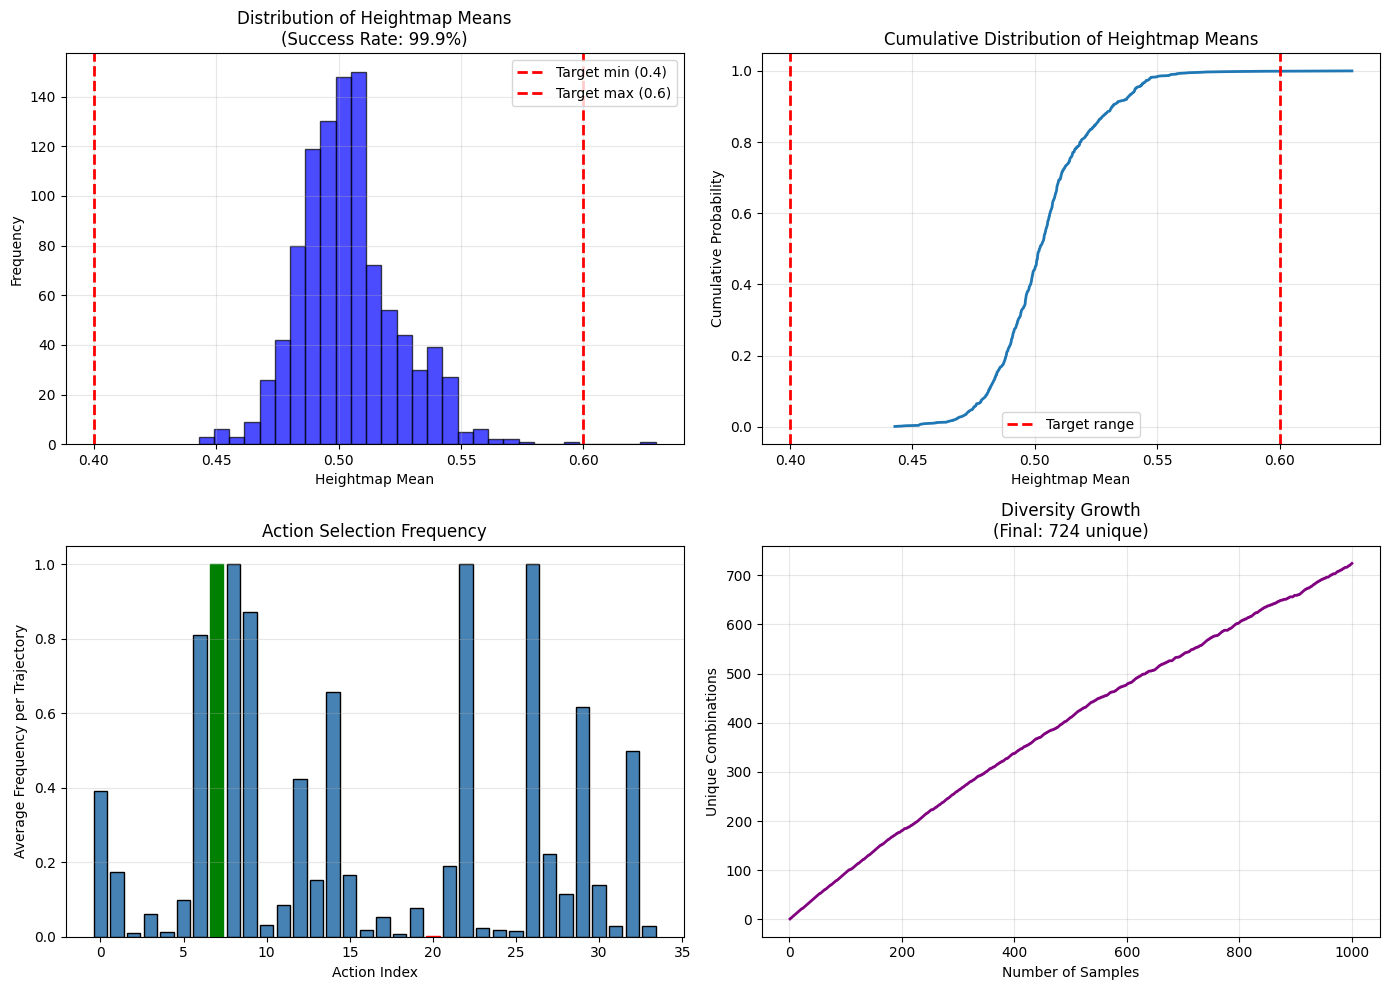


ACTION COMBINATION ANALYSIS

Most common action combinations:
  1. [6, 7, 8, 9, 12]... (appears 20x, 2.0%)
  2. [0, 6, 7, 8, 9]... (appears 14x, 1.4%)
  3. [0, 6, 7, 8, 9]... (appears 11x, 1.1%)
  4. [0, 6, 7, 8, 9]... (appears 11x, 1.1%)
  5. [0, 6, 7, 8, 9]... (appears 9x, 0.9%)

Least common action combinations:
  1. [3, 6, 7, 8, 9]... (appears 1x, 0.1%)
  2. [1, 7, 8, 9, 10]... (appears 1x, 0.1%)
  3. [0, 6, 7, 8, 9]... (appears 1x, 0.1%)
  4. [0, 6, 7, 8, 12]... (appears 1x, 0.1%)
  5. [5, 6, 7, 8, 9]... (appears 1x, 0.1%)

COMPARISON TO TARGET RANGE

In-range statistics (999 samples):
  Mean: 0.5038
  Std:  0.0199
  Min:  0.4428
  Max:  0.5936

Out-of-range statistics (1 samples):
  Mean: 0.6295
  Std:  0.0000
  Min:  0.6295
  Max:  0.6295

EXPORTING TO DATAFRAME

✓ Created DataFrame with 1000 trajectories

First 5 rows:
   trajectory_id                                actions  \
0              0  [26, 7, 22, 8, 9, 32, 14, 33, 12, 23]   
1              1   [26, 7, 29, 8, 22, 6, 1

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# ============================================================================
# Sample Trajectories from Trained Model
# ============================================================================

print("="*80)
print("SAMPLING TRAJECTORIES FROM TRAINED MODEL")
print("="*80)

model.eval()
num_samples = 1000
sampled_trajectories = []

print(f"\nGenerating {num_samples} samples...")

with torch.no_grad():
    for sample_idx in range(num_samples):
        trajectory = collect_trajectory(blender_api, s_wstep, action_dim, model=model, use_model=True)
        sampled_trajectories.append(trajectory)

# ============================================================================
# Analyze Samples
# ============================================================================

print(f"\n✓ Generated {len(sampled_trajectories)} trajectories")

# Extract statistics
heightmap_means = [t['heightmap_mean'] for t in sampled_trajectories]
action_tuples = [t['action_tuple'] for t in sampled_trajectories]
unique_combinations = set(action_tuples)

# Count samples in target range
in_range_count = sum(1 for hm in heightmap_means if target_min <= hm <= target_max)
success_rate = in_range_count / len(heightmap_means)

print(f"\nStatistics:")
print(f"  - Heightmap mean range: [{min(heightmap_means):.4f}, {max(heightmap_means):.4f}]")
print(f"  - Heightmap mean avg: {np.mean(heightmap_means):.4f} ± {np.std(heightmap_means):.4f}")
print(f"  - Target range [{target_min}, {target_max}]: {in_range_count}/{num_samples} ({success_rate:.1%})")
print(f"  - Unique action combinations: {len(unique_combinations)}")

# ============================================================================
# Show Sample Trajectories
# ============================================================================

print(f"\n" + "="*80)
print("SAMPLE TRAJECTORIES (first 10)")
print("="*80)

for i in range(min(10, len(sampled_trajectories))):
    traj = sampled_trajectories[i]
    in_range = target_min <= traj['heightmap_mean'] <= target_max
    status = "✓ IN RANGE" if in_range else "✗ OUT OF RANGE"

    print(f"\nTrajectory {i+1}:")
    print(f"  Actions: {traj['actions']}")
    print(f"  Heightmap mean: {traj['heightmap_mean']:.4f} {status}")

# ============================================================================
# Visualize Heightmap Distribution
# ============================================================================

print(f"\n" + "="*80)
print("VISUALIZATIONS")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Histogram of heightmap means
ax = axes[0, 0]
ax.hist(heightmap_means, bins=30, alpha=0.7, color='blue', edgecolor='black')
ax.axvline(target_min, color='red', linestyle='--', linewidth=2, label=f'Target min ({target_min})')
ax.axvline(target_max, color='red', linestyle='--', linewidth=2, label=f'Target max ({target_max})')
ax.set_xlabel('Heightmap Mean')
ax.set_ylabel('Frequency')
ax.set_title(f'Distribution of Heightmap Means\n(Success Rate: {success_rate:.1%})')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 2: Cumulative distribution
ax = axes[0, 1]
sorted_means = np.sort(heightmap_means)
cumulative = np.arange(1, len(sorted_means) + 1) / len(sorted_means)
ax.plot(sorted_means, cumulative, linewidth=2)
ax.axvline(target_min, color='red', linestyle='--', linewidth=2, label='Target range')
ax.axvline(target_max, color='red', linestyle='--', linewidth=2)
ax.set_xlabel('Heightmap Mean')
ax.set_ylabel('Cumulative Probability')
ax.set_title('Cumulative Distribution of Heightmap Means')
ax.legend()
ax.grid(True, alpha=0.3)

# Plot 3: Action frequency heatmap
ax = axes[1, 0]
action_counts = np.zeros(action_dim - 1)
for traj in sampled_trajectories:
    for action in traj['actions']:
        action_counts[action] += 1

action_counts = action_counts / num_samples  # Normalize by number of samples
bars = ax.bar(range(action_dim - 1), action_counts, color='steelblue', edgecolor='black')
ax.set_xlabel('Action Index')
ax.set_ylabel('Average Frequency per Trajectory')
ax.set_title('Action Selection Frequency')
ax.grid(True, alpha=0.3, axis='y')

# Highlight most and least common actions
if len(action_counts) > 0:
    most_common_idx = np.argmax(action_counts)
    least_common_idx = np.argmin(action_counts)
    bars[most_common_idx].set_color('green')
    bars[least_common_idx].set_color('red')

# Plot 4: Diversity over samples
ax = axes[1, 1]
cumulative_unique = []
seen = set()
for i, traj in enumerate(sampled_trajectories):
    seen.add(traj['action_tuple'])
    cumulative_unique.append(len(seen))

ax.plot(range(1, len(cumulative_unique) + 1), cumulative_unique, linewidth=2, color='purple')
ax.set_xlabel('Number of Samples')
ax.set_ylabel('Unique Combinations')
ax.set_title(f'Diversity Growth\n(Final: {len(unique_combinations)} unique)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('gflownet_trajectories_analysis.png', dpi=150, bbox_inches='tight')
print(f"\n✓ Saved visualization to 'gflownet_trajectories_analysis.png'")
plt.show()

# ============================================================================
# Show Most and Least Common Action Combinations
# ============================================================================

print(f"\n" + "="*80)
print("ACTION COMBINATION ANALYSIS")
print("="*80)

# Count frequency of each combination
from collections import Counter
combo_counts = Counter(action_tuples)
most_common = combo_counts.most_common(5)
least_common = combo_counts.most_common()[-5:]

print(f"\nMost common action combinations:")
for i, (combo, count) in enumerate(most_common, 1):
    freq = count / num_samples
    print(f"  {i}. {list(combo)[:5]}... (appears {count}x, {freq:.1%})")

print(f"\nLeast common action combinations:")
for i, (combo, count) in enumerate(least_common, 1):
    freq = count / num_samples
    print(f"  {i}. {list(combo)[:5]}... (appears {count}x, {freq:.1%})")

# ============================================================================
# Compare to Target Range
# ============================================================================

print(f"\n" + "="*80)
print("COMPARISON TO TARGET RANGE")
print("="*80)

in_range_means = [hm for hm in heightmap_means if target_min <= hm <= target_max]
out_range_means = [hm for hm in heightmap_means if not (target_min <= hm <= target_max)]

print(f"\nIn-range statistics ({len(in_range_means)} samples):")
if len(in_range_means) > 0:
    print(f"  Mean: {np.mean(in_range_means):.4f}")
    print(f"  Std:  {np.std(in_range_means):.4f}")
    print(f"  Min:  {np.min(in_range_means):.4f}")
    print(f"  Max:  {np.max(in_range_means):.4f}")
else:
    print(f"  No samples in range")

print(f"\nOut-of-range statistics ({len(out_range_means)} samples):")
if len(out_range_means) > 0:
    print(f"  Mean: {np.mean(out_range_means):.4f}")
    print(f"  Std:  {np.std(out_range_means):.4f}")
    print(f"  Min:  {np.min(out_range_means):.4f}")
    print(f"  Max:  {np.max(out_range_means):.4f}")
else:
    print(f"  All samples in range!")

# ============================================================================
# Export Trajectories to DataFrame
# ============================================================================

print(f"\n" + "="*80)
print("EXPORTING TO DATAFRAME")

print("="*80)

trajectory_data = []
for i, traj in enumerate(sampled_trajectories):
    in_range = target_min <= traj['heightmap_mean'] <= target_max
    trajectory_data.append({
        'trajectory_id': i,
        'actions': str(traj['actions']),
        'action_tuple': str(traj['action_tuple']),
        'heightmap_mean': traj['heightmap_mean'],
        'in_target_range': in_range
    })

import pandas as pd
sampled_df = pd.DataFrame(trajectory_data)

print(f"\n✓ Created DataFrame with {len(sampled_df)} trajectories")
print(f"\nFirst 5 rows:")
print(sampled_df.head())

print(f"\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)

# traj viz

TRAJECTORY VISUALIZATIONS

Visualizing Trajectory 1/5
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
✓ Saved to trajectory_1.png


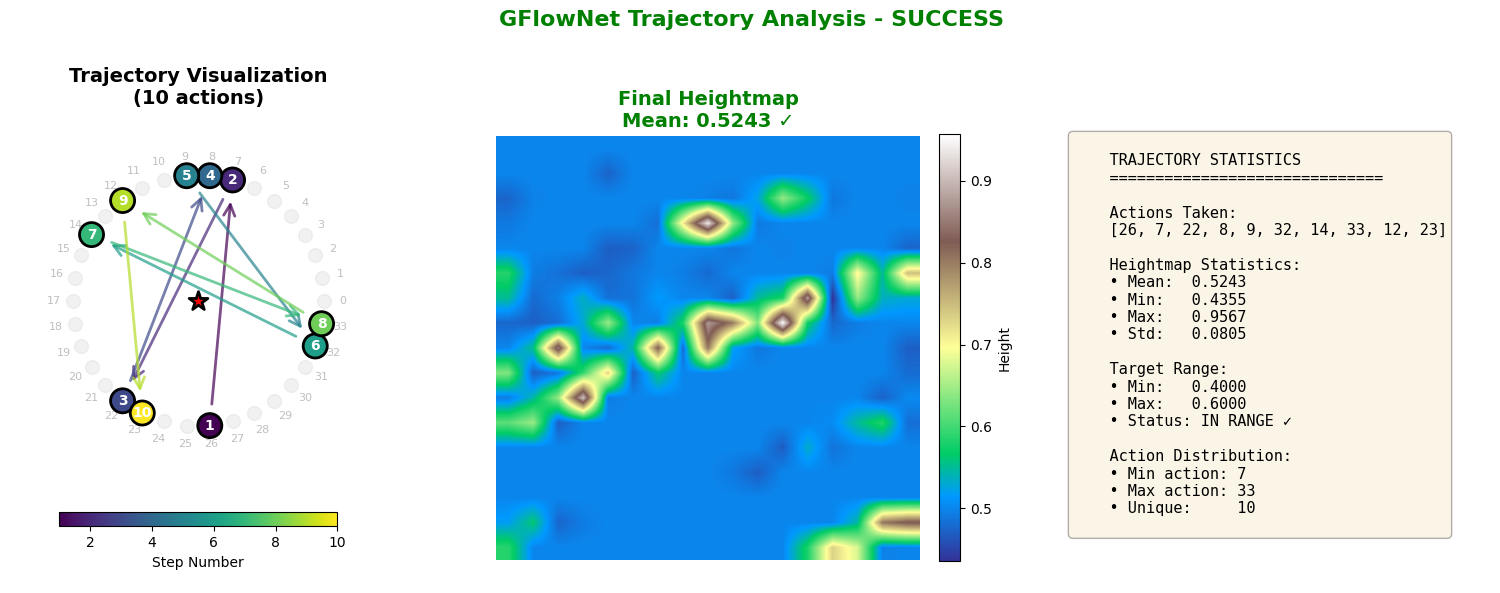


Visualizing Trajectory 2/5
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
✓ Saved to trajectory_2.png


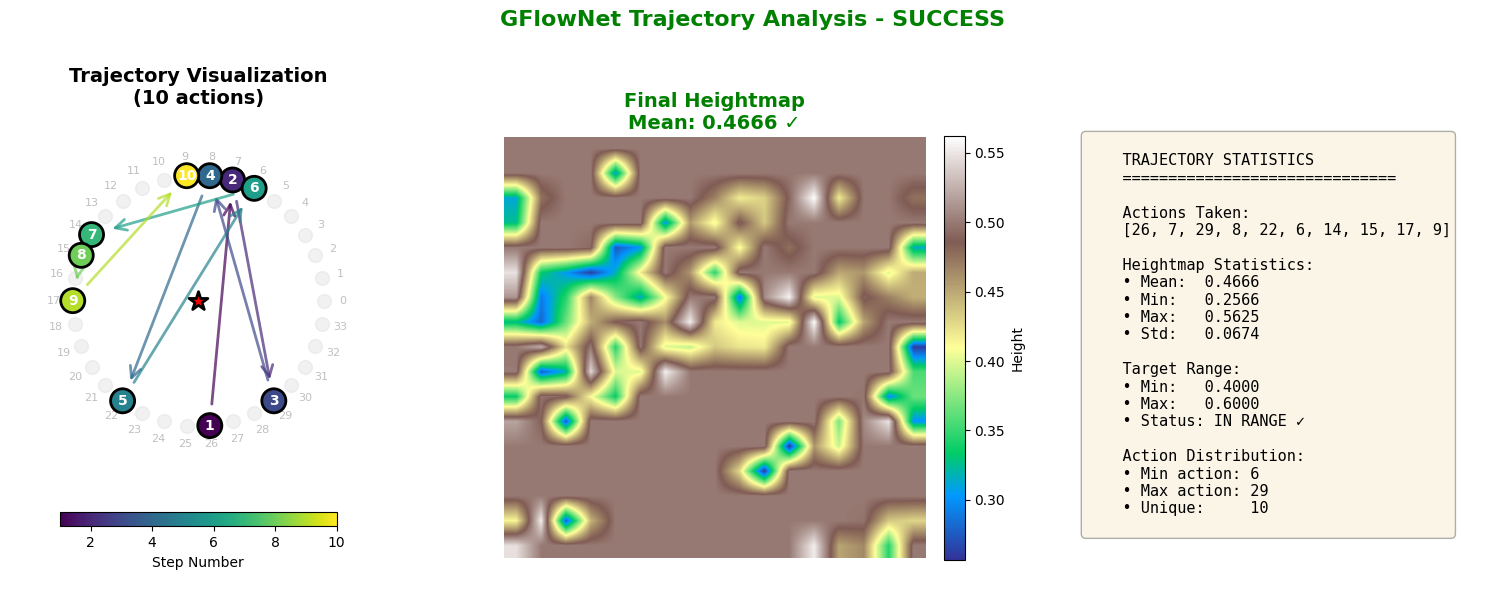


Visualizing Trajectory 3/5
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
✓ Saved to trajectory_3.png


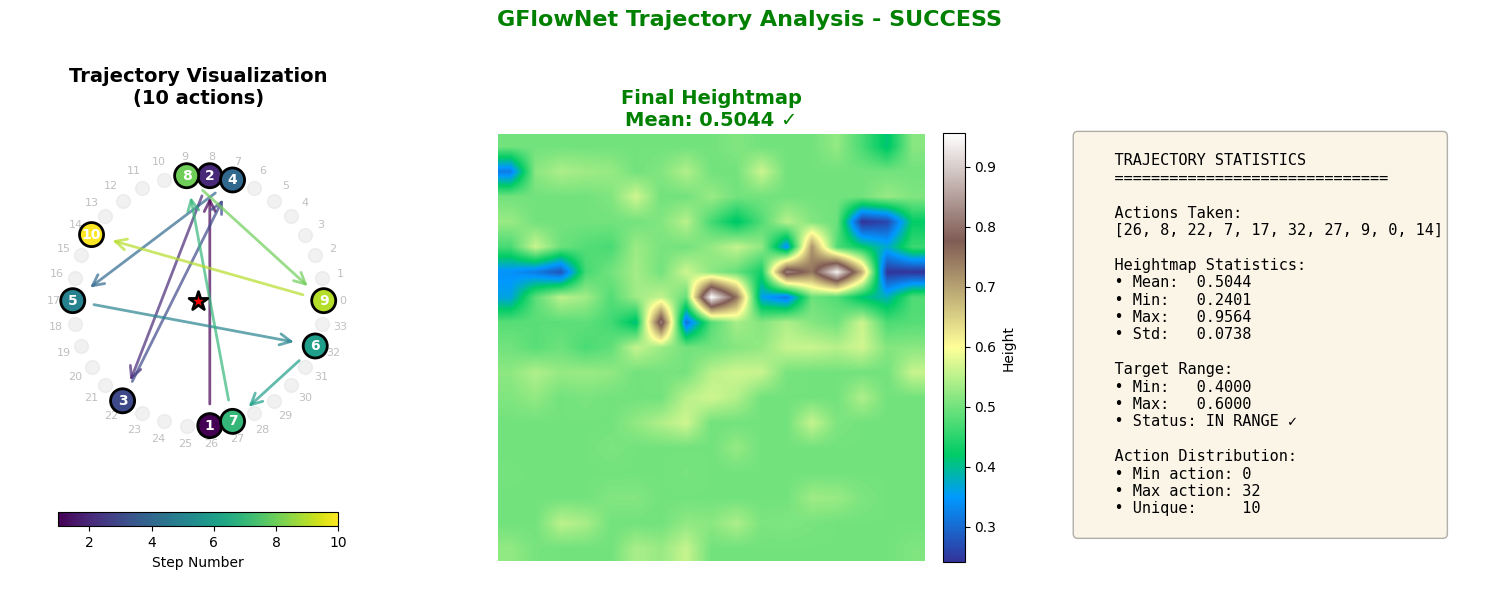


Visualizing Trajectory 4/5
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
✓ Saved to trajectory_4.png


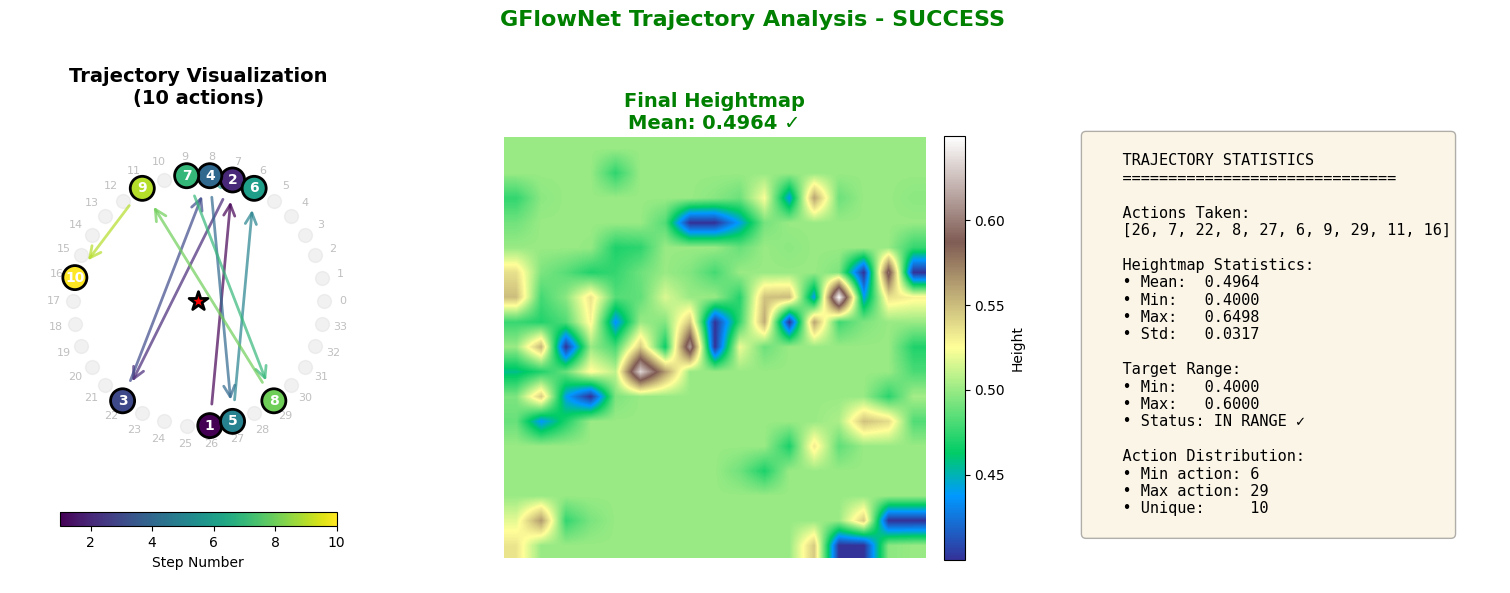


Visualizing Trajectory 5/5
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
✓ Saved to trajectory_5.png


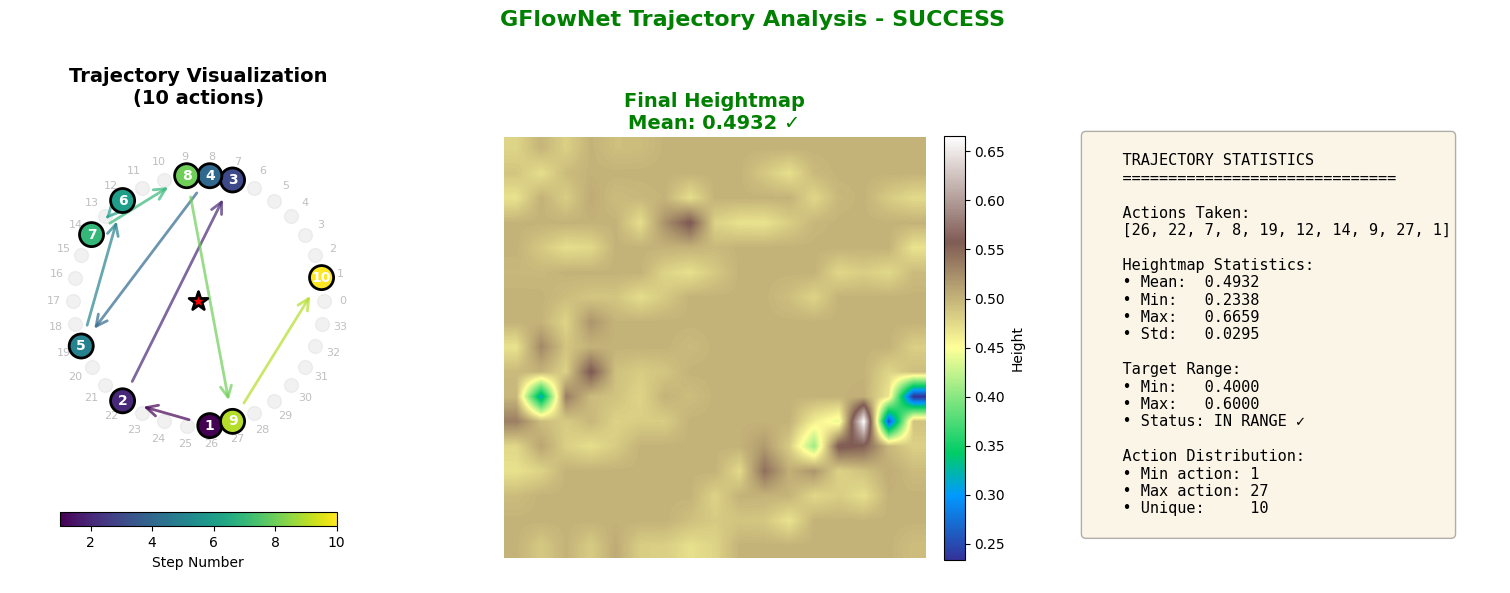


CREATING COMPARISON GRID
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"

✓ Saved comparison grid to 'trajectory_comparison_grid.png'


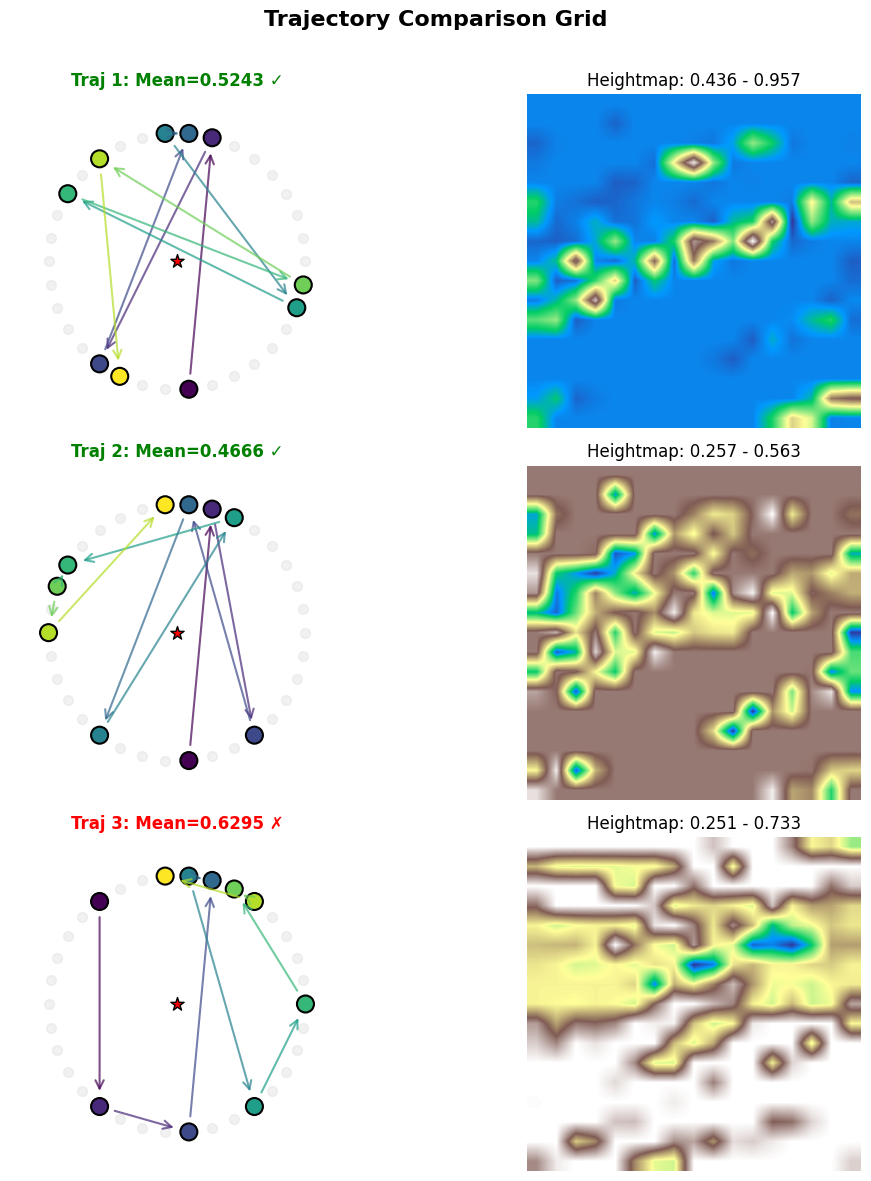


VISUALIZATION COMPLETE


In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import FancyArrowPatch, Circle
import matplotlib.patches as mpatches

# ============================================================================
# Trajectory Visualization Function
# ============================================================================

def visualize_trajectory(trajectory, action_dim, target_min, target_max, save_path=None):
    """
    Visualize a trajectory as a circular graph with arrows and show the final heightmap

    Args:
        trajectory: dict with 'actions', 'heightmap_mean', and heightmap data
        action_dim: number of actions
        target_min, target_max: target range for heightmap
        save_path: optional path to save figure
    """
    fig = plt.figure(figsize=(16, 6))

    # Create subplots
    ax1 = plt.subplot(1, 3, 1)  # Circular trajectory
    ax2 = plt.subplot(1, 3, 2)  # Heightmap
    ax3 = plt.subplot(1, 3, 3)  # Statistics

    actions = trajectory['actions']
    heightmap_mean = trajectory['heightmap_mean']
    in_range = target_min <= heightmap_mean <= target_max

    # ========================================================================
    # Plot 1: Circular Trajectory Visualization
    # ========================================================================

    num_actions = action_dim - 1  # Exclude done action

    # Create circle of action points
    angles = np.linspace(0, 2 * np.pi, num_actions, endpoint=False)
    radius = 1.0
    x_positions = radius * np.cos(angles)
    y_positions = radius * np.sin(angles)

    # Draw all possible action points (grey)
    ax1.scatter(x_positions, y_positions, s=100, c='lightgrey', alpha=0.3, zorder=1)

    # Label action indices
    for i in range(num_actions):
        ax1.text(x_positions[i] * 1.15, y_positions[i] * 1.15, str(i),
                ha='center', va='center', fontsize=8, color='grey', alpha=0.5)

    # Highlight selected actions
    selected_indices = actions
    selected_x = [x_positions[a] for a in selected_indices]
    selected_y = [y_positions[a] for a in selected_indices]

    # Color points by order (gradient)
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_indices)))
    ax1.scatter(selected_x, selected_y, s=300, c=colors, edgecolors='black',
               linewidths=2, zorder=3)

    # Draw arrows showing trajectory order
    for i in range(len(selected_indices) - 1):
        start_x, start_y = selected_x[i], selected_y[i]
        end_x, end_y = selected_x[i + 1], selected_y[i + 1]

        # Calculate arrow direction (shorten to not overlap circles)
        dx = end_x - start_x
        dy = end_y - start_y
        length = np.sqrt(dx**2 + dy**2)

        if length > 0:
            # Shorten arrow
            arrow_start_x = start_x + 0.15 * dx / length
            arrow_start_y = start_y + 0.15 * dy / length
            arrow_end_x = end_x - 0.15 * dx / length
            arrow_end_y = end_y - 0.15 * dy / length

            arrow = FancyArrowPatch(
                (arrow_start_x, arrow_start_y),
                (arrow_end_x, arrow_end_y),
                arrowstyle='->', mutation_scale=20, linewidth=2,
                color=colors[i], alpha=0.7, zorder=2
            )
            ax1.add_patch(arrow)

    # Add step numbers on selected points
    for i, (x, y) in enumerate(zip(selected_x, selected_y)):
        ax1.text(x, y, str(i+1), ha='center', va='center',
                fontsize=10, fontweight='bold', color='white')

    # Draw center
    ax1.scatter([0], [0], s=200, c='red', marker='*', zorder=4,
               edgecolors='black', linewidths=2, label='Start')

    # Formatting
    ax1.set_xlim(-1.5, 1.5)
    ax1.set_ylim(-1.5, 1.5)
    ax1.set_aspect('equal')
    ax1.set_title(f'Trajectory Visualization\n({len(actions)} actions)', fontsize=14, fontweight='bold')
    ax1.axis('off')

    # Add legend for color gradient
    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=1, vmax=len(actions)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax1, orientation='horizontal', pad=0.05, shrink=0.6)
    cbar.set_label('Step Number', fontsize=10)

    # ========================================================================
    # Plot 2: Heightmap Visualization
    # ========================================================================

    # Get heightmap from trajectory (need to replay to get it)
    blender_api.reset_env()
    for action in actions:
        s_wstep.execute_idx(blender_api, action)

    heightmap = blender_api.get_heightmap()
    heightmap_np = heightmap.cpu().numpy() if torch.is_tensor(heightmap) else heightmap

    # Plot heightmap
    im = ax2.imshow(heightmap_np, cmap='terrain', interpolation='bilinear')
    ax2.set_title(f'Final Heightmap\nMean: {heightmap_mean:.4f} {"✓" if in_range else "✗"}',
                 fontsize=14, fontweight='bold',
                 color='green' if in_range else 'red')
    ax2.axis('off')

    # Add colorbar
    cbar2 = plt.colorbar(im, ax=ax2, fraction=0.046, pad=0.04)
    cbar2.set_label('Height', fontsize=10)

    # ========================================================================
    # Plot 3: Statistics Panel
    # ========================================================================

    ax3.axis('off')

    # Create text summary
    stats_text = f"""
    TRAJECTORY STATISTICS
    {'='*30}

    Actions Taken:
    {actions}

    Heightmap Statistics:
    • Mean:  {heightmap_mean:.4f}
    • Min:   {heightmap_np.min():.4f}
    • Max:   {heightmap_np.max():.4f}
    • Std:   {heightmap_np.std():.4f}

    Target Range:
    • Min:   {target_min:.4f}
    • Max:   {target_max:.4f}
    • Status: {"IN RANGE ✓" if in_range else "OUT OF RANGE ✗"}

    Action Distribution:
    • Min action: {min(actions)}
    • Max action: {max(actions)}
    • Unique:     {len(set(actions))}
    """

    ax3.text(0.1, 0.95, stats_text, transform=ax3.transAxes,
            fontsize=11, verticalalignment='top', family='monospace',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

    # Overall title
    status_color = 'green' if in_range else 'red'
    fig.suptitle(f'GFlowNet Trajectory Analysis - {"SUCCESS" if in_range else "MISS"}',
                fontsize=16, fontweight='bold', color=status_color)

    plt.tight_layout(rect=[0, 0, 1, 0.96])

    if save_path:
        plt.savefig(save_path, dpi=150, bbox_inches='tight')
        print(f"✓ Saved to {save_path}")

    plt.show()

    return fig

# ============================================================================
# Visualize Multiple Trajectories
# ============================================================================

print("="*80)
print("TRAJECTORY VISUALIZATIONS")
print("="*80)

# Show first 5 sampled trajectories
num_to_visualize = 5

for i in range(min(num_to_visualize, len(sampled_trajectories))):
    traj = sampled_trajectories[i]
    print(f"\n{'='*80}")
    print(f"Visualizing Trajectory {i+1}/{num_to_visualize}")
    print(f"{'='*80}")

    visualize_trajectory(
        traj,
        action_dim,
        target_min,
        target_max,
        save_path=f'trajectory_{i+1}.png'
    )

# ============================================================================
# Create Comparison Grid for Multiple Trajectories
# ============================================================================

print(f"\n{'='*80}")
print("CREATING COMPARISON GRID")
print(f"{'='*80}")

# Select diverse trajectories: some in range, some out
in_range_trajs = [t for t in sampled_trajectories if target_min <= t['heightmap_mean'] <= target_max]
out_range_trajs = [t for t in sampled_trajectories if not (target_min <= t['heightmap_mean'] <= target_max)]

# Pick 2 from each category
compare_trajs = []
if len(in_range_trajs) >= 2:
    compare_trajs.extend(in_range_trajs[:2])
else:
    compare_trajs.extend(in_range_trajs)

if len(out_range_trajs) >= 2:
    compare_trajs.extend(out_range_trajs[:2])
else:
    compare_trajs.extend(out_range_trajs)

# Create comparison figure
fig, axes = plt.subplots(len(compare_trajs), 2, figsize=(12, 4*len(compare_trajs)))
if len(compare_trajs) == 1:
    axes = axes.reshape(1, -1)

for idx, traj in enumerate(compare_trajs):
    actions = traj['actions']
    heightmap_mean = traj['heightmap_mean']
    in_range = target_min <= heightmap_mean <= target_max

    # Left: Circular trajectory
    ax_left = axes[idx, 0]

    num_actions = action_dim - 1
    angles = np.linspace(0, 2 * np.pi, num_actions, endpoint=False)
    radius = 1.0
    x_positions = radius * np.cos(angles)
    y_positions = radius * np.sin(angles)

    ax_left.scatter(x_positions, y_positions, s=50, c='lightgrey', alpha=0.3)

    selected_indices = actions
    selected_x = [x_positions[a] for a in selected_indices]
    selected_y = [y_positions[a] for a in selected_indices]

    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_indices)))
    ax_left.scatter(selected_x, selected_y, s=150, c=colors, edgecolors='black', linewidths=1.5)

    for i in range(len(selected_indices) - 1):
        start_x, start_y = selected_x[i], selected_y[i]
        end_x, end_y = selected_x[i + 1], selected_y[i + 1]
        dx = end_x - start_x
        dy = end_y - start_y
        length = np.sqrt(dx**2 + dy**2)
        if length > 0:
            arrow = FancyArrowPatch(
                (start_x + 0.1*dx/length, start_y + 0.1*dy/length),
                (end_x - 0.1*dx/length, end_y - 0.1*dy/length),
                arrowstyle='->', mutation_scale=15, linewidth=1.5,
                color=colors[i], alpha=0.7
            )
            ax_left.add_patch(arrow)

    ax_left.scatter([0], [0], s=100, c='red', marker='*', edgecolors='black', linewidths=1)
    ax_left.set_xlim(-1.3, 1.3)
    ax_left.set_ylim(-1.3, 1.3)
    ax_left.set_aspect('equal')
    ax_left.set_title(f'Traj {idx+1}: Mean={heightmap_mean:.4f} {"✓" if in_range else "✗"}',
                     color='green' if in_range else 'red', fontweight='bold')
    ax_left.axis('off')

    # Right: Heightmap
    ax_right = axes[idx, 1]

    blender_api.reset_env()
    for action in actions:
        s_wstep.execute_idx(blender_api, action)

    heightmap = blender_api.get_heightmap()
    heightmap_np = heightmap.cpu().numpy() if torch.is_tensor(heightmap) else heightmap

    im = ax_right.imshow(heightmap_np, cmap='terrain', interpolation='bilinear')
    ax_right.set_title(f'Heightmap: {heightmap_np.min():.3f} - {heightmap_np.max():.3f}')
    ax_right.axis('off')

plt.suptitle('Trajectory Comparison Grid', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig('trajectory_comparison_grid.png', dpi=150, bbox_inches='tight')
print(f"\n✓ Saved comparison grid to 'trajectory_comparison_grid.png'")
plt.show()

print(f"\n{'='*80}")
print("VISUALIZATION COMPLETE")
print(f"{'='*80}")

## plotly

In [14]:
import plotly.graph_objects as go
import numpy as np
from PIL import Image
import io
import base64

# ============================================================================
# Helper: Create Circular Trajectory Image
# ============================================================================

def create_trajectory_circle_image(actions, action_dim, size=200):
    """Create a circular trajectory visualization as an image"""
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from matplotlib.patches import FancyArrowPatch

    fig, ax = plt.subplots(figsize=(size/100, size/100), dpi=100)

    num_actions = action_dim - 1
    angles = np.linspace(0, 2 * np.pi, num_actions, endpoint=False)
    radius = 1.0
    x_positions = radius * np.cos(angles)
    y_positions = radius * np.sin(angles)

    # All action points (grey)
    ax.scatter(x_positions, y_positions, s=30, c='lightgrey', alpha=0.3, zorder=1)

    # Selected actions
    selected_x = [x_positions[a] for a in actions]
    selected_y = [y_positions[a] for a in actions]

    # Color gradient
    colors = plt.cm.viridis(np.linspace(0, 1, len(actions)))
    ax.scatter(selected_x, selected_y, s=120, c=colors, edgecolors='black', linewidths=1.5, zorder=3)

    # Draw arrows
    for i in range(len(actions) - 1):
        start_x, start_y = selected_x[i], selected_y[i]
        end_x, end_y = selected_x[i + 1], selected_y[i + 1]
        dx = end_x - start_x
        dy = end_y - start_y
        length = np.sqrt(dx**2 + dy**2)

        if length > 0:
            arrow_start_x = start_x + 0.12 * dx / length
            arrow_start_y = start_y + 0.12 * dy / length
            arrow_end_x = end_x - 0.12 * dx / length
            arrow_end_y = end_y - 0.12 * dy / length

            arrow = FancyArrowPatch(
                (arrow_start_x, arrow_start_y),
                (arrow_end_x, arrow_end_y),
                arrowstyle='->', mutation_scale=12, linewidth=1.5,
                color=colors[i], alpha=0.7, zorder=2
            )
            ax.add_patch(arrow)

    # Add step numbers
    for i, (x, y) in enumerate(zip(selected_x, selected_y)):
        ax.text(x, y, str(i+1), ha='center', va='center',
                fontsize=7, fontweight='bold', color='white', zorder=4)

    # Center star
    ax.scatter([0], [0], s=80, c='red', marker='*', zorder=4,
               edgecolors='black', linewidths=1.5)

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('white')

    # Save to bytes
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1, facecolor='white', dpi=100)
    plt.close(fig)
    buf.seek(0)

    # Convert to base64
    img_base64 = base64.b64encode(buf.read()).decode()

    return f"data:image/png;base64,{img_base64}"

# ============================================================================
# Create Animated Slider View with External Trajectory Circle
# ============================================================================

print("="*80)
print("CREATING ANIMATED SLIDER WITH LARGER TRAJECTORY CIRCLE")
print("="*80)

# Use first 10 trajectories for slider
num_slider_trajs = min(10, len(sampled_trajectories))

# Prepare all heightmaps and trajectory images
heightmaps_data = []
for i in range(num_slider_trajs):
    traj = sampled_trajectories[i]
    blender_api.reset_env()
    for action in traj['actions']:
        s_wstep.execute_idx(blender_api, action)

    heightmap = blender_api.get_heightmap()
    heightmap_np = heightmap.cpu().numpy() if torch.is_tensor(heightmap) else heightmap

    # Create trajectory circle image (doubled size: 300 instead of 150)
    traj_image = create_trajectory_circle_image(traj['actions'], action_dim, size=300)

    heightmaps_data.append({
        'heightmap': heightmap_np,
        'trajectory': traj,
        'mean': traj['heightmap_mean'],
        'in_range': target_min <= traj['heightmap_mean'] <= target_max,
        'traj_image': traj_image
    })

# Prepare 3D data
height, width = heightmaps_data[0]['heightmap'].shape
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)

# Create frames
frames = []

for i, data in enumerate(heightmaps_data):
    hm = data['heightmap']
    traj = data['trajectory']
    mean_val = data['mean']
    in_range = data['in_range']

    status = "✓ IN RANGE" if in_range else "✗ OUT OF RANGE"
    status_color = "green" if in_range else "red"

    # Create mean plane
    mean_plane = np.full_like(hm, mean_val)

    # Create layout with trajectory image
    frame_layout = go.Layout(
        title=f'<b>Trajectory {i+1}/{num_slider_trajs}</b> - Mean: {mean_val:.4f} <span style="color:{status_color}"><b>{status}</b></span>',
        images=[
            dict(
                source=data['traj_image'],
                xref="paper",
                yref="paper",
                x=0.05,  # Position with buffer from left edge
                y=0.98,
                sizex=0.25,  # Doubled from 0.15 to 0.30 (but adjusted to 0.25 for balance)
                sizey=0.25,
                xanchor="left",  # Anchor to left edge
                yanchor="top",
                layer="above"
            )
        ]
    )

    frame = go.Frame(
        data=[
            # 3D Heightmap surface
            go.Surface(
                x=X, y=Y, z=hm,
                colorscale='earth',
                colorbar=dict(title="Height", x=1.0),
                name='Heightmap',
                hovertemplate='X: %{x}<br>Y: %{y}<br>Height: %{z:.4f}<extra></extra>',
                showlegend=False,
                cmin=0,  # Fixed z-range
                cmax=1
            ),
            # Mean plane
            go.Surface(
                x=X, y=Y, z=mean_plane,
                colorscale=[[0, 'rgba(0,255,0,0.3)'], [1, 'rgba(0,255,0,0.3)']] if in_range else [[0, 'rgba(255,0,0,0.2)'], [1, 'rgba(255,0,0,0.2)']],
                showscale=False,
                name=f'Mean ({mean_val:.4f})',
                hovertemplate=f'Mean: {mean_val:.4f}<extra></extra>',
                showlegend=False,
                opacity=0.5,
                visible=in_range
            )
        ],
        name=str(i),
        layout=frame_layout
    )
    frames.append(frame)

# Initial plot (first trajectory)
initial_data = heightmaps_data[0]
initial_hm = initial_data['heightmap']
initial_mean = initial_data['mean']
initial_in_range = initial_data['in_range']
initial_mean_plane = np.full_like(initial_hm, initial_mean)

initial_status = "✓ IN RANGE" if initial_in_range else "✗ OUT OF RANGE"
initial_status_color = "green" if initial_in_range else "red"

fig = go.Figure(
    data=[
        # Heightmap surface
        go.Surface(
            x=X, y=Y, z=initial_hm,
            colorscale='earth',
            colorbar=dict(title="Height", x=1.0),
            name='Heightmap',
            hovertemplate='X: %{x}<br>Y: %{y}<br>Height: %{z:.4f}<extra></extra>',
            showlegend=False,
            cmin=0,  # Fixed z-range 0-1
            cmax=1
        ),
        # Mean plane
        go.Surface(
            x=X, y=Y, z=initial_mean_plane,
            colorscale=[[0, 'rgba(0,255,0,0.3)'], [1, 'rgba(0,255,0,0.3)']] if initial_in_range else [[0, 'rgba(255,0,0,0.2)'], [1, 'rgba(255,0,0,0.2)']],
            showscale=False,
            name=f'Mean ({initial_mean:.4f})',
            hovertemplate=f'Mean: {initial_mean:.4f}<extra></extra>',
            showlegend=False,
            opacity=0.5,
            visible=initial_in_range
        )
    ],
    frames=frames
)

# Add slider
sliders = [dict(
    active=0,
    yanchor="bottom",
    y=-0.15,
    xanchor="left",
    x=0.15,
    currentvalue=dict(
        prefix="Trajectory: ",
        visible=True,
        xanchor="center",
        font=dict(size=14)
    ),
    pad=dict(b=10, t=10),
    len=0.7,
    steps=[dict(
        args=[[f.name], dict(
            frame=dict(duration=0, redraw=True),
            mode="immediate",
            transition=dict(duration=0)
        )],
        label=f'{i+1}',
        method="animate"
    ) for i, f in enumerate(frames)]
)]

fig.update_layout(
    title=dict(
        text=f'<b>Trajectory 1/{num_slider_trajs}</b> - Mean: {initial_mean:.4f} <span style="color:{initial_status_color}"><b>{initial_status}</b></span>',
        font=dict(size=18),
        y=0.98,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Height',
        zaxis=dict(range=[0, 1]),  # Fixed z-axis range 0-1
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.3)),
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=0.5)
    ),
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[
            dict(label="▶ Play",
                 method="animate",
                 args=[None, dict(frame=dict(duration=1500, redraw=True),
                                 fromcurrent=True,
                                 mode="immediate")]),
            dict(label="⏸ Pause",
                 method="animate",
                 args=[[None], dict(frame=dict(duration=0, redraw=False),
                                   mode="immediate")])
        ],
        x=0.90,
        y=-0.15,
        xanchor="right",
        yanchor="bottom"
    )],
    sliders=sliders,
    images=[
        dict(
            source=initial_data['traj_image'],
            xref="paper",
            yref="paper",
            x=0.05,  # Buffer from left edge
            y=0.98,
            sizex=0.25,  # Doubled size (was 0.15, now 0.25)
            sizey=0.25,
            xanchor="left",
            yanchor="top",
            layer="above"
        )
    ],
    height=700,
    width=1200,
    showlegend=False,
    margin=dict(l=50, r=50, t=100, b=100)  # Add margins for buffer
)

fig.write_html('heightmap_3d_animated_final.html')
print(f"\n✓ Saved animated view to 'heightmap_3d_animated_final.html'")
fig.show()

print(f"\n{'='*80}")
print("ANIMATION COMPLETE")
print(f"{'='*80}")
print("\nFeatures:")
print("  - 3D heightmap with mean plane (main view)")
print("  - Larger trajectory circle in top-left (25% size, doubled from before)")
print("  - Buffer space from left edge (5% margin)")
print("  - Fixed Z-axis range: 0.0 to 1.0 (consistent across all trajectories)")
print("  - Play/Pause buttons at bottom")
print("  - Slider at bottom to browse trajectories")

CREATING ANIMATED SLIDER WITH LARGER TRAJECTORY CIRCLE
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"

✓ Saved animated view to 'heightmap_3d_animated_final.html'



ANIMATION COMPLETE

Features:
  - 3D heightmap with mean plane (main view)
  - Larger trajectory circle in top-left (25% size, doubled from before)
  - Buffer space from left edge (5% margin)
  - Fixed Z-axis range: 0.0 to 1.0 (consistent across all trajectories)
  - Play/Pause buttons at bottom
  - Slider at bottom to browse trajectories


## trajectory viz

In [15]:
import plotly.graph_objects as go
import numpy as np
from PIL import Image
import io
import base64

# ============================================================================
# Helper: Create Circular Trajectory Image
# ============================================================================

def create_trajectory_circle_image(actions, action_dim, size=200):
    """Create a circular trajectory visualization as an image"""
    import matplotlib.pyplot as plt
    import matplotlib.patches as mpatches
    from matplotlib.patches import FancyArrowPatch

    fig, ax = plt.subplots(figsize=(size/100, size/100), dpi=100)

    num_actions = action_dim - 1
    angles = np.linspace(0, 2 * np.pi, num_actions, endpoint=False)
    radius = 1.0
    x_positions = radius * np.cos(angles)
    y_positions = radius * np.sin(angles)

    # All action points (grey)
    ax.scatter(x_positions, y_positions, s=30, c='lightgrey', alpha=0.3, zorder=1)

    if len(actions) > 0:
        # Selected actions
        selected_x = [x_positions[a] for a in actions]
        selected_y = [y_positions[a] for a in actions]

        # Color gradient
        colors = plt.cm.viridis(np.linspace(0, 1, len(actions)))
        ax.scatter(selected_x, selected_y, s=120, c=colors, edgecolors='black', linewidths=1.5, zorder=3)

        # Draw arrows
        for i in range(len(actions) - 1):
            start_x, start_y = selected_x[i], selected_y[i]
            end_x, end_y = selected_x[i + 1], selected_y[i + 1]
            dx = end_x - start_x
            dy = end_y - start_y
            length = np.sqrt(dx**2 + dy**2)

            if length > 0:
                arrow_start_x = start_x + 0.12 * dx / length
                arrow_start_y = start_y + 0.12 * dy / length
                arrow_end_x = end_x - 0.12 * dx / length
                arrow_end_y = end_y - 0.12 * dy / length

                arrow = FancyArrowPatch(
                    (arrow_start_x, arrow_start_y),
                    (arrow_end_x, arrow_end_y),
                    arrowstyle='->', mutation_scale=12, linewidth=1.5,
                    color=colors[i], alpha=0.7, zorder=2
                )
                ax.add_patch(arrow)

        # Add step numbers
        for i, (x, y) in enumerate(zip(selected_x, selected_y)):
            ax.text(x, y, str(i+1), ha='center', va='center',
                    fontsize=7, fontweight='bold', color='white', zorder=4)

    # Center star
    ax.scatter([0], [0], s=80, c='red', marker='*', zorder=4,
               edgecolors='black', linewidths=1.5)

    ax.set_xlim(-1.3, 1.3)
    ax.set_ylim(-1.3, 1.3)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_facecolor('white')

    # Save to bytes
    buf = io.BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0.1, facecolor='white', dpi=100)
    plt.close(fig)
    buf.seek(0)

    # Convert to base64
    img_base64 = base64.b64encode(buf.read()).decode()

    return f"data:image/png;base64,{img_base64}"

# ============================================================================
# Create Sequential Step-by-Step Animation
# ============================================================================

print("="*80)
print("CREATING STEP-BY-STEP TRAJECTORY SEQUENCE ANIMATION")
print("="*80)

# Select one trajectory to visualize step-by-step
trajectory_idx = 0  # Change this to visualize a different trajectory
selected_traj = sampled_trajectories[trajectory_idx]
full_actions = selected_traj['actions']

print(f"Visualizing trajectory with {len(full_actions)} steps")
print(f"Actions: {full_actions}")

# Prepare 3D data
# We'll need to get heightmap at each step
step_data = []

# Initial state (no actions)
blender_api.reset_env()
initial_heightmap = blender_api.get_heightmap()
initial_heightmap_np = initial_heightmap.cpu().numpy() if torch.is_tensor(initial_heightmap) else initial_heightmap

step_data.append({
    'step_num': 0,
    'actions_so_far': [],
    'heightmap': initial_heightmap_np,
    'mean': initial_heightmap_np.mean()
})

# Execute each action and capture state
blender_api.reset_env()
for step_idx, action in enumerate(full_actions):
    s_wstep.execute_idx(blender_api, action)
    heightmap = blender_api.get_heightmap()
    heightmap_np = heightmap.cpu().numpy() if torch.is_tensor(heightmap) else heightmap

    actions_so_far = full_actions[:step_idx+1]

    step_data.append({
        'step_num': step_idx + 1,
        'actions_so_far': list(actions_so_far),
        'heightmap': heightmap_np,
        'mean': heightmap_np.mean()
    })

print(f"Captured {len(step_data)} states (including initial)")

# Create coordinate grids
height, width = step_data[0]['heightmap'].shape
x = np.arange(width)
y = np.arange(height)
X, Y = np.meshgrid(x, y)

# Create frames for each step
frames = []

for i, data in enumerate(step_data):
    hm = data['heightmap']
    mean_val = data['mean']
    actions_so_far = data['actions_so_far']
    step_num = data['step_num']

    in_range = target_min <= mean_val <= target_max
    status = "✓ IN RANGE" if in_range else "✗ OUT OF RANGE"
    status_color = "green" if in_range else "red"

    # Create mean plane
    mean_plane = np.full_like(hm, mean_val)

    # Create trajectory circle for actions taken so far
    traj_image = create_trajectory_circle_image(actions_so_far, action_dim, size=300)

    # Create layout with trajectory image
    if step_num == 0:
        title_text = f'<b>Initial State (Step 0/{len(full_actions)})</b> - Mean: {mean_val:.4f}'
    else:
        last_action = actions_so_far[-1] if actions_so_far else None
        title_text = f'<b>Step {step_num}/{len(full_actions)}</b> - Action {last_action} - Mean: {mean_val:.4f} <span style="color:{status_color}"><b>{status}</b></span>'

    frame_layout = go.Layout(
        title=title_text,
        images=[
            dict(
                source=traj_image,
                xref="paper",
                yref="paper",
                x=0.05,
                y=0.98,
                sizex=0.25,
                sizey=0.25,
                xanchor="left",
                yanchor="top",
                layer="above"
            )
        ]
    )

    frame = go.Frame(
        data=[
            # 3D Heightmap surface
            go.Surface(
                x=X, y=Y, z=hm,
                colorscale='earth',
                colorbar=dict(title="Height", x=1.0),
                name='Heightmap',
                hovertemplate='X: %{x}<br>Y: %{y}<br>Height: %{z:.4f}<extra></extra>',
                showlegend=False,
                cmin=0,
                cmax=1
            ),
            # Mean plane
            go.Surface(
                x=X, y=Y, z=mean_plane,
                colorscale=[[0, 'rgba(0,255,0,0.3)'], [1, 'rgba(0,255,0,0.3)']] if in_range else [[0, 'rgba(255,0,0,0.2)'], [1, 'rgba(255,0,0,0.2)']],
                showscale=False,
                name=f'Mean ({mean_val:.4f})',
                hovertemplate=f'Mean: {mean_val:.4f}<extra></extra>',
                showlegend=False,
                opacity=0.5,
                visible=in_range
            )
        ],
        name=str(i),
        layout=frame_layout
    )
    frames.append(frame)

# Initial plot (step 0)
initial_data = step_data[0]
initial_hm = initial_data['heightmap']
initial_mean = initial_data['mean']
initial_mean_plane = np.full_like(initial_hm, initial_mean)
initial_traj_image = create_trajectory_circle_image([], action_dim, size=300)

fig = go.Figure(
    data=[
        # Heightmap surface
        go.Surface(
            x=X, y=Y, z=initial_hm,
            colorscale='earth',
            colorbar=dict(title="Height", x=1.0),
            name='Heightmap',
            hovertemplate='X: %{x}<br>Y: %{y}<br>Height: %{z:.4f}<extra></extra>',
            showlegend=False,
            cmin=0,
            cmax=1
        ),
        # Mean plane
        go.Surface(
            x=X, y=Y, z=initial_mean_plane,
            colorscale=[[0, 'rgba(0,255,0,0.3)'], [1, 'rgba(0,255,0,0.3)']],
            showscale=False,
            name=f'Mean ({initial_mean:.4f})',
            hovertemplate=f'Mean: {initial_mean:.4f}<extra></extra>',
            showlegend=False,
            opacity=0.5,
            visible=False  # Initially hidden
        )
    ],
    frames=frames
)

# Add slider
sliders = [dict(
    active=0,
    yanchor="bottom",
    y=-0.15,
    xanchor="left",
    x=0.15,
    currentvalue=dict(
        prefix="Step: ",
        visible=True,
        xanchor="center",
        font=dict(size=14)
    ),
    pad=dict(b=10, t=10),
    len=0.7,
    steps=[dict(
        args=[[f.name], dict(
            frame=dict(duration=0, redraw=True),
            mode="immediate",
            transition=dict(duration=0)
        )],
        label=f'{i}',
        method="animate"
    ) for i, f in enumerate(frames)]
)]

fig.update_layout(
    title=dict(
        text=f'<b>Initial State (Step 0/{len(full_actions)})</b> - Mean: {initial_mean:.4f}',
        font=dict(size=18),
        y=0.98,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Height',
        zaxis=dict(range=[0, 1]),
        camera=dict(eye=dict(x=1.5, y=1.5, z=1.3)),
        aspectmode='manual',
        aspectratio=dict(x=1, y=1, z=0.5)
    ),
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[
            dict(label="▶ Play",
                 method="animate",
                 args=[None, dict(frame=dict(duration=1000, redraw=True),
                                 fromcurrent=True,
                                 mode="immediate")]),
            dict(label="⏸ Pause",
                 method="animate",
                 args=[[None], dict(frame=dict(duration=0, redraw=False),
                                   mode="immediate")])
        ],
        x=0.90,
        y=-0.15,
        xanchor="right",
        yanchor="bottom"
    )],
    sliders=sliders,
    images=[
        dict(
            source=initial_traj_image,
            xref="paper",
            yref="paper",
            x=0.05,
            y=0.98,
            sizex=0.25,
            sizey=0.25,
            xanchor="left",
            yanchor="top",
            layer="above"
        )
    ],
    height=700,
    width=1200,
    showlegend=False,
    margin=dict(l=50, r=50, t=100, b=100)
)

fig.write_html('heightmap_3d_sequence_animation.html')
print(f"\n✓ Saved sequence animation to 'heightmap_3d_sequence_animation.html'")
fig.show()

print(f"\n{'='*80}")
print("STEP-BY-STEP SEQUENCE ANIMATION COMPLETE")
print(f"{'='*80}")
print("\nFeatures:")
print(f"  - Shows {len(step_data)} steps (including initial state)")
print("  - Heightmap evolves as each action is applied")
print("  - Trajectory circle grows to show actions taken so far")
print("  - Slider lets you step through the sequence")
print("  - Play button animates the full sequence")
print("  - Fixed Z-axis range: 0.0 to 1.0")

CREATING STEP-BY-STEP TRAJECTORY SEQUENCE ANIMATION
Visualizing trajectory with 10 steps
Actions: [26, 7, 22, 8, 9, 32, 14, 33, 12, 23]
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Read blend: "/home/jpleona/jpleona_c/bpygfn/gfn_environments/single_color_ramp.blend"
Captured 11 states (including initial)

✓ Saved sequence animation to 'heightmap_3d_sequence_animation.html'



STEP-BY-STEP SEQUENCE ANIMATION COMPLETE

Features:
  - Shows 11 steps (including initial state)
  - Heightmap evolves as each action is applied
  - Trajectory circle grows to show actions taken so far
  - Slider lets you step through the sequence
  - Play button animates the full sequence
  - Fixed Z-axis range: 0.0 to 1.0
